In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

videos_df = pd.read_csv("USvideos.csv")
videos_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [20]:
def mean_squared_error(errors: list):
    total = 0
    for error in errors:
        total+= error**2
    return total/len(errors)

=error= 16727531.320000004


<ipython-input-25-61bebcb8560f>:25: RuntimeWarning: overflow encountered in double_scalars
  derivative_of_mse_with_respect_to_m = -(2/len(likes)) * (y - (m*x + b)) * x #why is negative sign in front necessary?
<ipython-input-25-61bebcb8560f>:27: RuntimeWarning: invalid value encountered in double_scalars
  m += -derivative_of_mse_with_respect_to_m * learn_rate


NameError: name 'time' is not defined

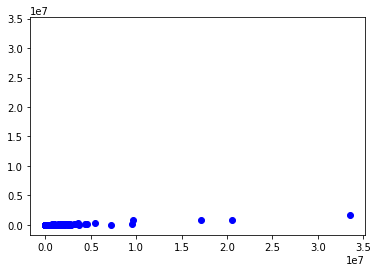

In [25]:
import time
views = np.array(videos_df[:300]["views"])
likes = np.array(videos_df[:300]["likes"])
# like_ratio = np.array(videos_df["likes"]/videos_df["dislikes"])

mean_views = sum(views)/len(views)
mean_likes = sum(likes)/len(likes)

fig, ax = plt.subplots()
ax.scatter(views, likes, color="blue")

iterations = 1000
learn_rate = 0.01
m = 1
b = 0
x = np.linspace(0, max(views), len(likes))
y = m*x + b 
# x = np.linspace(0, max(views), 100)
# y = (mean_likes/mean_views)*x + 0 

line, = ax.plot(x, y, color="black")
for i in range(iterations):
    # errors = [predicted_output-correct_output for predicted_output, correct_output in zip(list(y), list(likes))]
    # mse = mean_squared_error(errors)
    for x, y in zip(list(views), list(likes)):
        derivative_of_mse_with_respect_to_m = -(2/len(likes)) * (y - (m*x + b)) * x #why is negative sign in front necessary?
        derivative_of_mse_with_respect_to_b = -(2/len(likes)) * (y - (m*x +b))
        m_gradient += -derivative_of_mse_with_respect_to_m * learn_rate
        b_gradient += -derivative_of_mse_with_respect_to_b * learn_rate
    y = m*x + b 
    line.set_data(x, y)
    print("==error==", mse)  
    time.sleep(3)
 
# line.set_data